In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

In [2]:
# Half adder
# input qubits: a, b
# output qubits: s (sum) and cout (carry-out)
def halfadd(circ, a, b, s, cout) :
    circ.cx(a, s)
    circ.cx(b, s)
    circ.ccx(a, b, cout)

In [3]:
# Create registers and circuit
a = QuantumRegister(1, 'a')  # input
b = QuantumRegister(1, 'b')
s = QuantumRegister(2, 'out')  # output
qc = QuantumCircuit(a,b,s)

In [4]:
# All combinations of input
qc.h(a)
qc.h(b)
qc.barrier()
# Build adder circuit
halfadd(qc, a, b, s[0], s[1])
qc.barrier()
# Measure the sum
m = ClassicalRegister(2, 'sum')
qc.add_register(m)
qc.measure(s,m)

In [5]:
# Simulate and show results
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=4096)  # shots default = 1024
result = job.result()
print(result.get_counts())

{'00': 1022, '01': 2097, '10': 977}


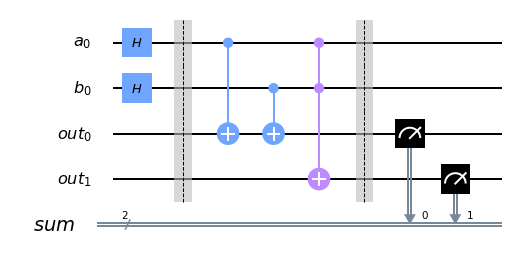

In [6]:
qc.draw(output='mpl')

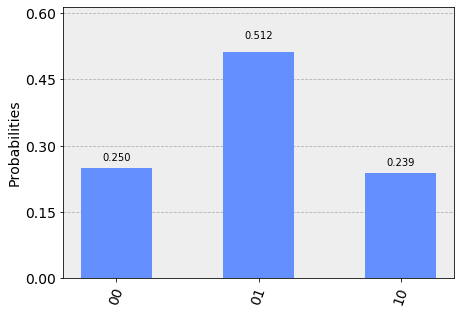

In [7]:
plot_histogram(result.get_counts())